In [1]:

import os, shutil
from glob import glob
import numpy as np
import pandas as pd
from natsort import natsorted
import seaborn as sns
from tqdm import tqdm, trange
import matplotlib.pyplot as plt


In [27]:
in_dir = "out01_tms_induced_respose/"
out_dir = "out02_plot_sigals/"
in_file_name = "HRF_tms_induced_response.csv"

if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    
complete_df = pd.read_csv(in_dir + in_file_name)

subject_info = pd.read_csv("age_gender_edu.txt", sep = ',')
data = subject_info.merge(complete_df, left_on = 'cc_post_intake_id', right_on = 'subject')
data.drop(labels = ['inputfile', 'cc_post_intake_id'], axis = 1, inplace = True)
data.replace({'gender': {1: "male", 2: "female"}}, inplace = True)
data

,gender,age,yrs_of_edu,subject,site,group,tms_site_response_standard,tms_site_response_individual_6mm,tms_site_response_individual_10mm,tms_site_response_individual_14mm,tms_site_response_individual_14-10mm,tms_site_response_individual_10-6mm
0,female,45,18,1001,L_Fp,NTHC,0.287125,0.439684,0.456288,0.395807,0.354767,0.462649
1,female,45,18,1001,L_pMFG,NTHC,-0.358279,-0.463813,-0.439631,-0.329946,-0.264645,-0.431570
2,female,45,18,1001,R_FEF,NTHC,-0.252532,-0.423779,-0.511036,-0.496599,-0.487678,-0.540984
3,female,45,18,1001,R_Fp,NTHC,0.245202,0.278052,0.265166,0.243850,0.230372,0.260594
4,female,45,18,1001,R_M1,NTHC,-1.002989,-1.403756,-1.606550,-1.550770,-1.520768,-1.663231
...,...,...,...,...,...,...,...,...,...,...,...,...
749,male,22,14,2108,R_IPL,TEHC,1.236482,0.391417,1.001566,1.383794,1.611196,1.196951
750,male,22,14,2108,R_M1,TEHC,0.124382,0.233850,0.166974,0.150504,0.140419,0.144036
751,male,22,14,2108,R_aMFG,TEHC,-0.279814,-0.045608,-0.032161,-0.082834,-0.115168,-0.027050
752,male,22,14,2108,R_pMFG,TEHC,0.363362,-0.020677,0.119496,0.184963,0.224639,0.165267


SyntaxError: unexpected EOF while parsing (<ipython-input-28-41a6ed2d0511>, line 4)

In [46]:
## boxplot of response (gender by site):

a4_dims = (12, 8)
tms_sites = complete_df['site'].unique()

colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(tms_sites)).as_hex()
colors = colors[1::2] + colors[2::2] 

# add p value annotation manually:
def add_annot(x1, x2, y, h, p, ax, color = 'k'):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=color)
    if p>=.001:
        txt = "${p}$=%.3f" % p
    else:
        txt = "${p}$<.001"

    print(txt)
    ax.text((x1+x2)*.5, y+h, txt, ha='center', va='bottom', color=color, size = 30)


def plot_response(ylabel):

    fig, ax = plt.subplots(figsize=a4_dims, dpi=300)

    # p = sns.stripplot(data=complete_df,x = 'site', y="tms_site_response_standard",
    #                   jitter=0.1,dodge=5,size=2,alpha=1);
#     sns.violinplot(x ='site', y ='tms_site_response_standard',
#                    data = complete_df,
#                    linewidth=0.7,
#                    saturation=0.5)

    sns.swarmplot(y = ylabel, x = "site", data = complete_df, 
                  #hue = 'gender', 
                  dodge=True, ax = ax, facecolors='none',
                  palette = colors, #plot_kws={'scatter_kws': {'alpha': 0.1}}
                  alpha = .75, size=4)

    sns.boxplot(y = ylabel, x = "site", data = complete_df, #hue = 'gender', 
                palette = colors, notch = True, ax = ax)
    
    for i,artist in enumerate(ax.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)

    # sns.boxplot(data=df,x="site",y="tms_site_response",dodge=True,showfliers=False,
                # showbox=True,linewidth=0.8,color = "w");


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(tms_sites)])
    # ax.set_ylim([0, 25000])
    ax.set_ylabel("Mean TMS Site Response")
    ax.set_xlabel("TMS Site");
    # ax.set_xticklabels(["Control", "Epilepsy"]);

    # Add horizontal red lines indicating mean of violinplot
    spread = 0.1

#     for i, label in enumerate(ax.get_xticklabels()):
#         tms = label.get_text()
#         mean = np.nanmean(complete_df[complete_df['site']==str(tms)]['tms_site_response_standard'])
#         ax.hlines(mean, i-spread, i+spread, colors='red')
    ax.hlines(0, -1,len(tms_sites), linestyles='dotted', colors='grey')

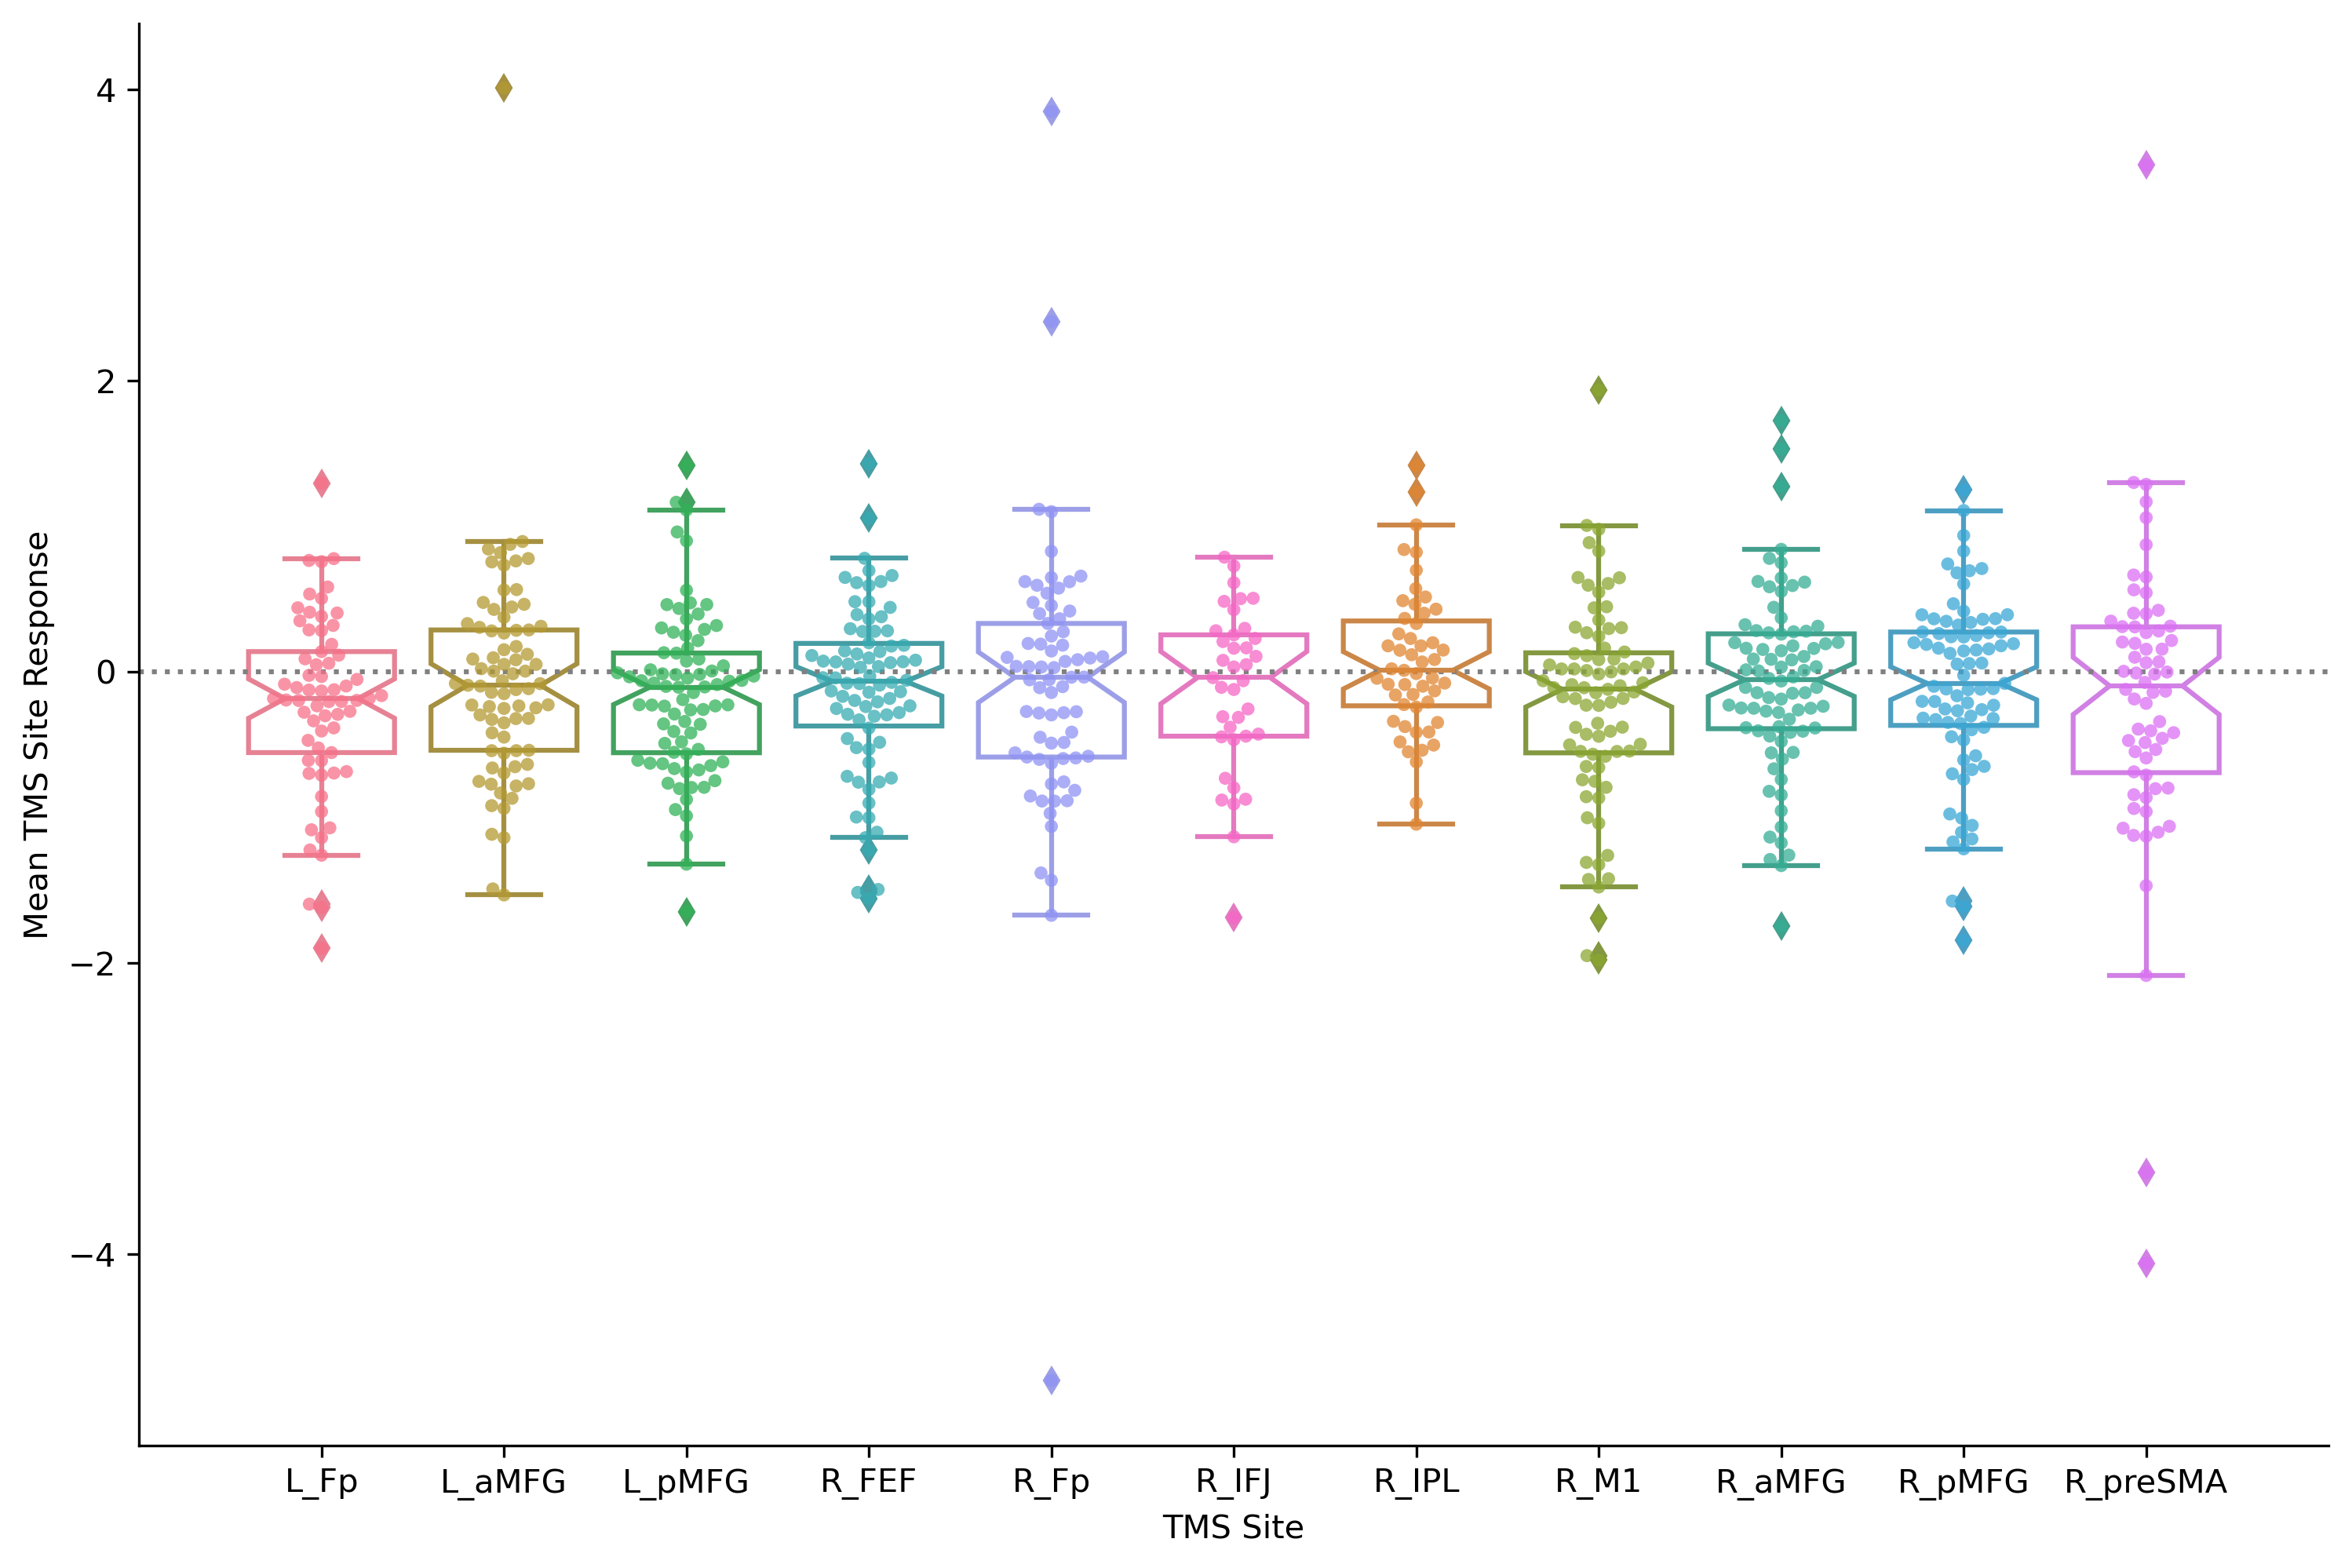

In [47]:
plot_response("tms_site_response_standard")

In [ ]:
complete_df

In [ ]:
complete_df[complete_df['site']=="R_IPL"]

In [ ]:

# sns.set(font_scale=1.2)

complete_df = complete_df.dropna(axis=0, subset=["subject_tms_site_response"])
a4_dims = (10, 4)

fig, ax = plt.subplots(figsize=a4_dims, dpi=200)

# ax.set_ylabel("Disconnectome Score")
# ax.set_xlabel("")
# ax.set_xticklabels(["Control", "Epilepsy"])
p = sns.stripplot(data=complete_df,x = 'site', y="subject_tms_site_response",jitter=0.1,dodge=5,size=2,alpha=1,
                 order=["L_Fp","R_Fp","L_aMFG","R_aMFG","L_pMFG","R_pMFG","R_IFJ","R_FEF","R_M1","R_preSMA","R_IPL"],
                 edgecolor='black',
                 linewidth=0.2);



# sns.boxplot(data=df,x="site",y="tms_site_response",dodge=True,showfliers=False,
            # showbox=True,linewidth=0.8,color = "w");
sns.violinplot(x ='site', y ='subject_tms_site_response',
               data = complete_df,
               linewidth=0.7,
               saturation=0.5, 
               order=["L_Fp","R_Fp","L_aMFG","R_aMFG","L_pMFG","R_pMFG","R_IFJ","R_FEF","R_M1","R_preSMA","R_IPL"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_xlim([-1, len(tms_sites)])
# ax.set_ylim([0, 25000])
ax.set_ylabel("BOLD Response",fontdict={'weight': 'bold', 'fontsize':'14'})
ax.set_xlabel("TMS Sites",fontdict={'weight': 'bold', 'fontsize':'12'});
ax.set_xticklabels(["L FP","R FP","LA dlPFC","RA dlPFC","LP dlPFC","RP dlPFC","R IFJ","R FEF","R M1","R preSMA","R IPL"],fontdict={'weight': 'bold'});
ax.set_yticks([-6,-4,-2,0,2,4,6]);
ax.set_yticklabels(["-6", "-4", "-2", "0", "2", "4", "6"],fontdict={'weight': 'bold'});
# ax.tick_params(axis='y', fontdict={'weight': 'bold'})

ax.tick_params(axis='x', labelrotation=45)

# Add horizontal red lines indicating mean of violinplot
spread = 0.2

for i, label in enumerate(["L_Fp","R_Fp","L_aMFG","R_aMFG","L_pMFG","R_pMFG","R_IFJ","R_FEF","R_M1","R_preSMA","R_IPL"]):
    mean = np.mean(complete_df[complete_df['site']==str(label)]['subject_tms_site_response'])
    ax.hlines(mean, i-spread, i+spread, colors='red')
ax.hlines(0, -1,len(tms_sites), linestyles='dotted', colors='grey')

# Individual TMS Sites response to TMS Stimulation, 6/10/14mm spheres

In [ ]:

# sns.set(font_scale=1.2)

for sphere_size in ["6mm", "10mm", "14mm"]:

    complete_df = pd.read_csv("group_analysis_HRF_tms_induced_response_maps_table_COMPLETE.csv")
    complete_df = complete_df.dropna(axis=0, subset=[f"subject_{sphere_size}_tms_site_response"])
    a4_dims = (10, 4)

    fig, ax = plt.subplots(figsize=a4_dims, dpi=200)

    p = sns.stripplot(data=complete_df,x = 'site', y=f"subject_{sphere_size}_tms_site_response",jitter=0.1,dodge=5,size=2,alpha=1,
                     order=["L_Fp","R_Fp","L_aMFG","R_aMFG","L_pMFG","R_pMFG","R_IFJ","R_FEF","R_M1","R_preSMA","R_IPL"],
                     edgecolor='black',
                     linewidth=0.2);

    sns.violinplot(x ='site', y ='subject_6mm_tms_site_response',
                   data = complete_df,
                   linewidth=0.7,
                   saturation=0.5, 
                   order=["L_Fp","R_Fp","L_aMFG","R_aMFG","L_pMFG","R_pMFG","R_IFJ","R_FEF","R_M1","R_preSMA","R_IPL"])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(tms_sites)])
    ax.set_ylabel("BOLD Response",fontdict={'weight': 'bold', 'fontsize':'14'})
    ax.set_xlabel("TMS Sites",fontdict={'weight': 'bold', 'fontsize':'12'});
    ax.set_xticklabels(["L FP","R FP","LA dlPFC","RA dlPFC","LP dlPFC","RP dlPFC","R IFJ","R FEF","R M1","R preSMA","R IPL"],fontdict={'weight': 'bold'});
    ax.set_yticks([-6,-4,-2,0,2,4,6]);
    ax.set_yticklabels(["-6", "-4", "-2", "0", "2", "4", "6"],fontdict={'weight': 'bold'});
    # ax.tick_params(axis='y', fontdict={'weight': 'bold'})

    ax.tick_params(axis='x', labelrotation=45)

    # Add horizontal red lines indicating mean of violinplot
    spread = 0.2

    for i, label in enumerate(["L_Fp","R_Fp","L_aMFG","R_aMFG","L_pMFG","R_pMFG","R_IFJ","R_FEF","R_M1","R_preSMA","R_IPL"]):
        mean = np.mean(complete_df[complete_df['site']==str(label)][f'subject_{sphere_size}_tms_site_response'])
        ax.hlines(mean, i-spread, i+spread, colors='red')
    ax.hlines(0, -1,len(tms_sites), linestyles='dotted', colors='grey')
    # plt.savefig(f"figure_{sphere_size}.png")

# Individual Causal Connectome
## Connectivity of TMS Sites to Amygdala

In [ ]:
amygdala_mask = []
site = []
site_connectivity = []
subject_site_connectivity = []
subject = []
for amy in amygdala_sites.keys():
    individual_network_maps = glob(f"/data/nimlab/USERS/wd957/CausalConnectome/Sept_8/CausalConnectome_conn_singlesubjects/{str(amy)}/*.nii.gz")
    for indiv_map in tqdm(individual_network_maps):
        for tms in tms_sites.keys():
            subid = os.path.basename(indiv_map).split(".nii")[0].split("HC")[-1]
            subject.append(subid)
            amygdala_mask.append(str(amy))
            site.append(str(tms))
            site_connectivity.append(np.mean(tms_sites[tms]['masker'].transform(indiv_map)))
            if str(subid) in subject_tms_sites[tms]:
                subject_site_connectivity.append(np.mean(subject_tms_sites[tms][str(subid)].transform(indiv_map)))
            else:
                subject_site_connectivity.append(np.nan)
            
individual_causal_connectome_df = pd.DataFrame()
individual_causal_connectome_df['amygdala_mask'] = amygdala_mask
individual_causal_connectome_df['site'] = site
individual_causal_connectome_df["subject"]=subject
individual_causal_connectome_df['site_connectivity'] = site_connectivity
individual_causal_connectome_df['subject_site_connectivity'] = subject_site_connectivity
individual_causal_connectome_df.to_csv("individual_causal_connectome_amygdala_connectivity.csv", index=False)
        

In [ ]:

individual_causal_connectome_df = pd.read_csv("individual_causal_connectome_amygdala_connectivity.csv")
a4_dims = (12, 6*len(amygdala_sites.keys()))
fig, ax = plt.subplots(nrows=len(amygdala_sites.keys()), ncols=1, figsize=a4_dims, dpi=200)

for i, amy in enumerate(amygdala_sites.keys()):

    sns.stripplot(data=individual_causal_connectome_df[individual_causal_connectome_df['amygdala_mask']==str(amy)],
                  x = 'site', y="site_connectivity",
                  jitter=0.1,
                  dodge=5,
                  size=2,
                  alpha=1, 
                  ax=ax[i]);

    sns.violinplot(x ='site', y ='site_connectivity',
                   data = individual_causal_connectome_df[individual_causal_connectome_df['amygdala_mask']==str(amy)],
                   linewidth=0.7,
                   saturation=0.5,
                   ax=ax[i]);

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].set_xlim([-1, len(tms_sites)])
    # ax.set_ylim([0, 25000])
    ax[i].set_title(f"Amygdala Mask: {str(amy)}")
    ax[i].set_ylabel("Mean TMS Site Connectivity to Amygdala")
    ax[i].set_xlabel("TMS Site");
    # ax.set_xticklabels(["Control", "Epilepsy"]);
    
    # Add horizontal red lines indicating mean of violinplot
    spread = 0.4
    
    for j, label in enumerate(ax[i].get_xticklabels()):
        tms = label.get_text()
        mean = np.mean(individual_causal_connectome_df[(individual_causal_connectome_df['amygdala_mask']==str(amy))&
                                                           (individual_causal_connectome_df['site']==str(tms))]['site_connectivity'])
        ax[i].hlines(mean, j-spread, j+spread, colors='red')
    
    ax[i].hlines(0, -1,len(tms_sites), linestyles='dotted', colors='grey')

In [ ]:

individual_causal_connectome_df = pd.read_csv("individual_causal_connectome_amygdala_connectivity.csv")
individual_causal_connectome_df = individual_causal_connectome_df.dropna(axis=0)

a4_dims = (12, 6*len(amygdala_sites.keys()))
fig, ax = plt.subplots(nrows=len(amygdala_sites.keys()), ncols=1, figsize=a4_dims, dpi=200)

for i, amy in enumerate(amygdala_sites.keys()):

    sns.stripplot(data=individual_causal_connectome_df[individual_causal_connectome_df['amygdala_mask']==str(amy)],
                  x = 'site', y="subject_site_connectivity",
                  jitter=0.1,
                  dodge=5,
                  size=2,
                  alpha=1, 
                  ax=ax[i]);

    sns.violinplot(x ='site', y ='subject_site_connectivity',
                   data = individual_causal_connectome_df[individual_causal_connectome_df['amygdala_mask']==str(amy)],
                   linewidth=0.7,
                   saturation=0.5,
                   ax=ax[i]);

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].set_xlim([-1, len(tms_sites)])
    # ax.set_ylim([0, 25000])
    ax[i].set_title(f"Amygdala Mask: {str(amy)}")
    ax[i].set_ylabel("Mean TMS Subject-Specific Site Connectivity to Amygdala")
    ax[i].set_xlabel("TMS Site");
    # ax.set_xticklabels(["Control", "Epilepsy"]);
    
    # Add horizontal red lines indicating mean of violinplot
    spread = 0.4
    
    for j, label in enumerate(ax[i].get_xticklabels()):
        tms = label.get_text()
        mean = np.mean(individual_causal_connectome_df[(individual_causal_connectome_df['amygdala_mask']==str(amy))&
                                                           (individual_causal_connectome_df['site']==str(tms))]['subject_site_connectivity'])
        ax[i].hlines(mean, j-spread, j+spread, colors='red')
    
    ax[i].hlines(0, -1,len(tms_sites), linestyles='dotted', colors='grey')

# 1-sample T-tests

In [ ]:
complete_df

In [ ]:
from scipy.stats import ttest_1samp
complete_df = pd.read_csv("group_analysis_HRF_tms_induced_response_maps_table_COMPLETE.csv")
# complete_df = complete_df.dropna(axis=0)
tstat = []
pvalue = []
sites = []
mean = []
for tms in tms_sites.keys():
    t, p = ttest_1samp(complete_df[complete_df['site']==str(tms)]['tms_site_response'], popmean=0)
    sites.append(tms)
    tstat.append(t)
    pvalue.append(p)
    mean.append(np.mean(complete_df[complete_df['site']==str(tms)]['tms_site_response']))
ttest_tms_induced_response = pd.DataFrame()
ttest_tms_induced_response["site"]=sites
ttest_tms_induced_response["tstat"]=tstat
ttest_tms_induced_response["pvalue"]=pvalue
ttest_tms_induced_response["mean"]=mean

ttest_tms_induced_response.to_csv("ttest_tms_induced_response.csv", index=False)
    

In [ ]:
from scipy.stats import ttest_1samp
# Subject Specific
complete_df = pd.read_csv("group_analysis_HRF_tms_induced_response_maps_table_COMPLETE.csv")
complete_df = complete_df.dropna(axis=0)
tstat = []
pvalue = []
sites = []
mean = []
for tms in tms_sites.keys():
    t, p = ttest_1samp(complete_df[complete_df['site']==str(tms)]['subject_tms_site_response'], popmean=0)
    sites.append(tms)
    tstat.append(t)
    pvalue.append(p)
    mean.append(np.mean(complete_df[complete_df['site']==str(tms)]['subject_tms_site_response']))
ttest_tms_induced_response = pd.DataFrame()
ttest_tms_induced_response["site"]=sites
ttest_tms_induced_response["tstat"]=tstat
ttest_tms_induced_response["pvalue"]=pvalue
ttest_tms_induced_response["mean"]=mean

ttest_tms_induced_response.to_csv("ttest_tms_induced_response_subject_specific.csv", index=False)
    